In [15]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
from urllib.parse import urlparse

In [16]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'

In [17]:
parts = urlparse(url)
parts

ParseResult(scheme='https', netloc='drive.google.com', path='/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view', params='', query='', fragment='')

In [31]:
url = 'https://drive.google.com/file/d/1LBDnhITL0Wqwp5G6M6IBI-SSz8BIoNec/view'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
train_df = pd.read_csv(url)

In [32]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
X = train_df.iloc[:,5:7]
X = pd.get_dummies(X)
X = X.values
X

array([[33.6  ,  0.627],
       [26.6  ,  0.351],
       [23.3  ,  0.672],
       ...,
       [26.2  ,  0.245],
       [30.1  ,  0.349],
       [30.4  ,  0.315]])

In [37]:
y = train_df.iloc[:,-1].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

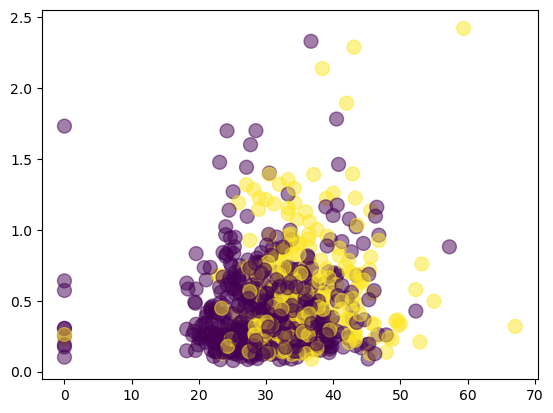

In [53]:
plt.scatter(X[:,0], X[:,1], s=100, c=y, alpha=0.5)
plt.show()

In [54]:
# разбиваем dataset на test / train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)

In [55]:
#подключение классификатора KNN
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=5

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  61.979166666666664


In [56]:
y_pred = model.predict(X_test)
y_pred == y_test

array([ True, False, False,  True, False, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
       False, False, False, False,  True, False, False,  True, False,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,

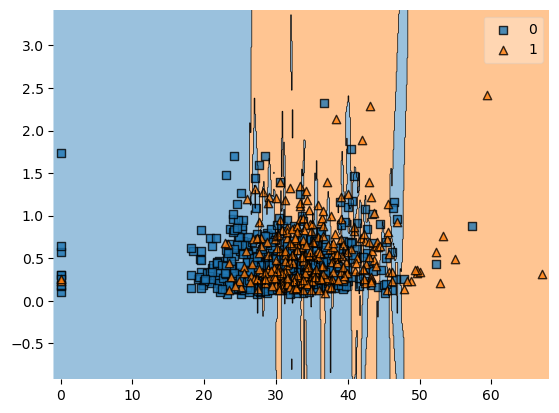

In [57]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)
plt.show()

In [58]:
n_neighbors=10

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)


The accuracy is  64.58333333333334


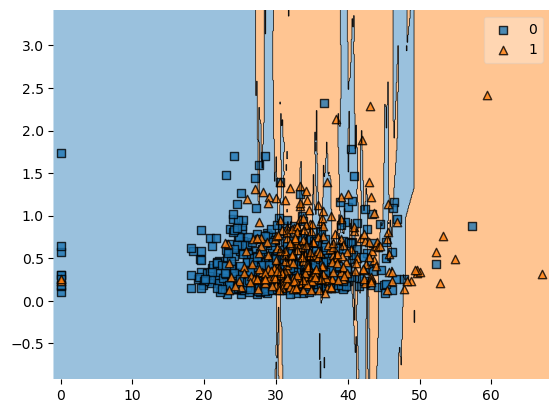

In [59]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)
plt.show()

In [60]:
n_neighbors=15

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  67.1875


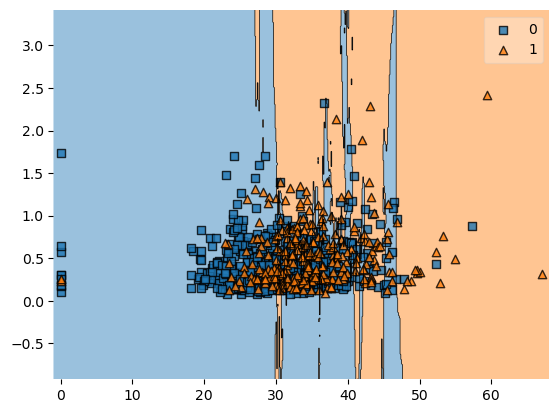

In [61]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)
plt.show()

In [62]:
n_neighbors=20

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  69.27083333333334


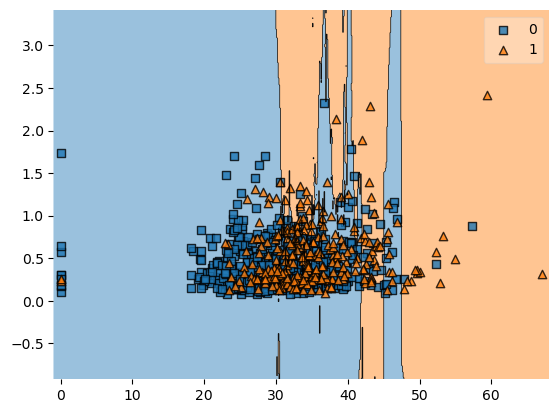

In [63]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)
plt.show()

In [64]:
n_neighbors=25

model = KNeighborsClassifier(n_neighbors = n_neighbors)
model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print("The accuracy is ",score*100)

The accuracy is  69.27083333333334


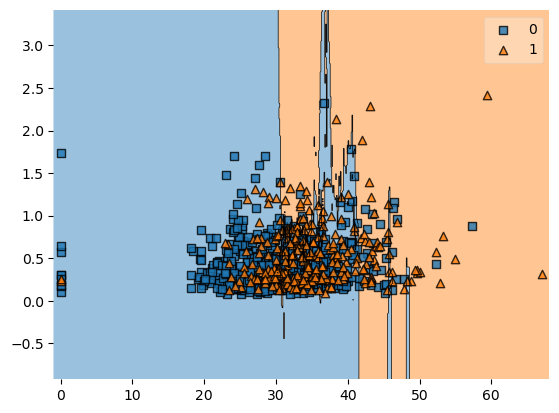

In [65]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=model)
plt.show()